In [1]:
#The test.csv file lacks a major feature: User_Traffic. Therefore, the model can not predict values.
#Still, I have designed the model and
#I have commented the code required to predict the values for test.csv


import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
#reading data
data=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')
#getting information about the data
data.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d641f77f0>,
      dtype=object)

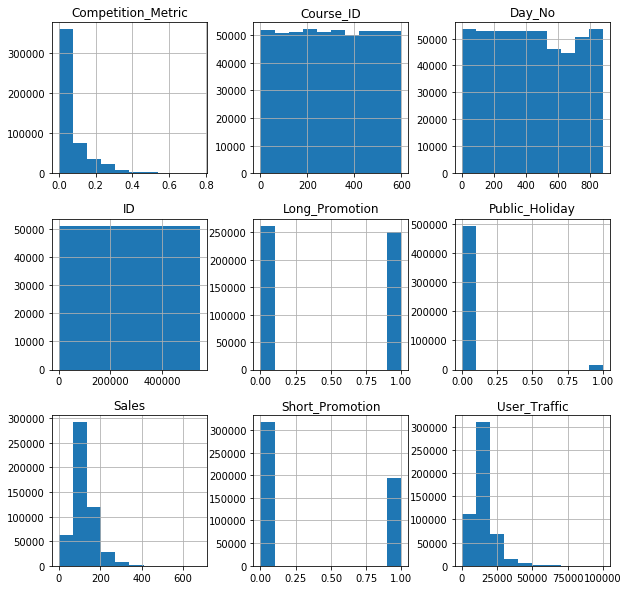

In [3]:
#clearly, Competition_Metric has some null values
#filling null values
data['Competition_Metric'].fillna(data['Competition_Metric'].median(), inplace=True)
#plotting histogram
data.hist(figsize=(10,10))

In [4]:
data.corr()    #Finding the co-relation between the features

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001052,0.999996,-0.000005,0.001274,-0.039570,0.033604,-0.007156,0.017037
Day_No,0.001052,1.000000,-0.000506,0.014645,0.019112,-0.020204,0.021511,0.003188,0.060012
Course_ID,0.999996,-0.000506,1.000000,-0.000027,0.001242,-0.039605,0.033520,-0.007110,0.016894
Short_Promotion,-0.000005,0.014645,-0.000027,1.000000,-0.018770,-0.001149,0.198785,0.000180,0.367762
Public_Holiday,0.001274,0.019112,0.001242,-0.018770,1.000000,0.008319,-0.108305,-0.000483,-0.135052
Long_Promotion,-0.039570,-0.020204,-0.039605,-0.001149,0.008319,1.000000,-0.204289,-0.117862,-0.109455
User_Traffic,0.033604,0.021511,0.033520,0.198785,-0.108305,-0.204289,1.000000,-0.148185,0.829741
Competition_Metric,-0.007156,0.003188,-0.007110,0.000180,-0.000483,-0.117862,-0.148185,1.000000,-0.021716
Sales,0.017037,0.060012,0.016894,0.367762,-0.135052,-0.109455,0.829741,-0.021716,1.000000


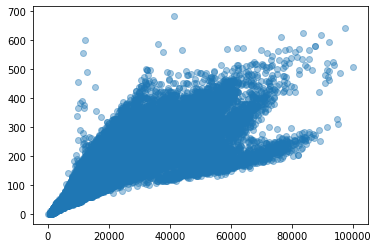

In [5]:
#Clearly, User-Traffichas high co-relation with the Sales
#also, the ID feature seems to be of no use. It seems to be similar to serial number. It can therefore be dropped
#The Course_ID is of no use too as course type and domain provide us with the necessary info

#plotting the User-Id vs Sales
%matplotlib inline
plt.scatter(data['User_Traffic'], data['Sales'], alpha=0.4)

In [6]:
#Splitting into training and validation sets

x_train, x_val=train_test_split(data, test_size=0.2, random_state=42)
y_train=x_train['Sales']
y_val=x_val['Sales']

In [7]:
#Using pipelines, making necessary transformations:
#feature scaling for numerical data
#one hot encoding for categorical data
#removing Course_ID and ID features


one1=OneHotEncoder()
num=data.keys()
num=list(num.drop('Course_Domain').drop('Course_Type').drop('Sales').drop('Course_ID').drop('ID'))
cat=['Course_Domain', 'Course_Type']
pip=ColumnTransformer([('scaler', StandardScaler(), num), ('one_hot', OneHotEncoder(), cat)])
#for train(split) and validation sets
x_train=pip.fit_transform(x_train)
x_val=pip.transform(x_val)

In [8]:
#Now that the data is ready, testing various regression algorithms on the data
#Model1: Linear Regression
model=LinearRegression()
model.fit(x_train, y_train)
print('TRAIN Score: ', model.score(x_train, y_train),'RMSE:', (np.sqrt(mean_squared_error(model.predict(x_train), y_train))))
print('VAL Score: ', model.score(x_val, y_val),'RMSE: ', (np.sqrt(mean_squared_error(model.predict(x_val), y_val))))

#TRAIN Score:  0.8311006662213631 RMSE: 22.314463893203595
#VAL Score:  0.8309090374763841 RMSE:  22.447376844945993

TRAIN Score:  0.8311006662213631 RMSE: 22.314463893203595
VAL Score:  0.8309090374763841 RMSE:  22.447376844945993


In [23]:
#Model2: Decision Tree Regression (after tuning the parameters)
model2=DecisionTreeRegressor(min_samples_leaf=10, max_depth=17)
model2.fit(x_train, y_train)
print('TRAIN Score: ', model2.score(x_train, y_train),'RMSE: ', (np.sqrt(mean_squared_error(model2.predict(x_train), y_train))))
print('VAL Score: ', model2.score(x_val, y_val),'RMSE: ', (np.sqrt(mean_squared_error(model2.predict(x_val), y_val))))

#TTRAIN Score:  0.9586337859985531 RMSE:  11.04321115436024
#VAL Score:  0.9443682157550336 RMSE:  12.87558273615192

TRAIN Score:  0.9586337859985531 RMSE:  11.04321115436024
VAL Score:  0.9443682157550336 RMSE:  12.87558273615192


In [44]:
#Model3: Random Forest Regression (after tuning the parameters)
model3=RandomForestRegressor(max_depth=18, n_estimators=20, ccp_alpha=0.001)
model3.fit(x_train, y_train)
print('TRAIN Score: ', model3.score(x_train, y_train),'RMSE: ', (np.sqrt(mean_squared_error(model3.predict(x_train), y_train))))
print('VAL Score:', model3.score(x_val, y_val),'RMSE: ', (np.sqrt(mean_squared_error(model3.predict(x_val), y_val))))
#TRAIN Score:  0.9772334589052626 RMSE:  8.192586129646038
#VAL Score: 0.9571821453416332 RMSE:  11.29582228809414

TRAIN Score:  0.9772334589052626 RMSE:  8.192586129646038
VAL Score: 0.9571821453416332 RMSE:  11.29582228809414


In [96]:
#***for full train and test sets***

'''
x=pip.fit_transform(data)
y=data['Sales']
x_test=pip.transform(data_test)
model_final=RandomForestRegressor(max_depth=18, n_estimators=20, ccp_alpha=0.001)
model_final.fit(x, y)
print('TRAIN Score: ', model_final.score(x, y),'RMSE: ', (np.sqrt(mean_squared_error(model_final.predict(x), y))))
data_test['Sales']=model_final.predict(x_test)

#outputting data to csv file
data_test.to_csv('train_predicted.csv', index=False)
'''